In [1]:
from client import *

test_client = Client(2)
test_client.get_label()

Reading /home/dhz/bci-data/ds003478-download/sub-002/eeg/sub-002_task-Rest_run-01_eeg.fdt


array([[0.04, 0.47],
       [0.04, 0.47]])

In [2]:
import mne as mne
import numpy as np
import pandas as pd
import torch as torch

data_root_dir = '/home/dhz/bci-data/ds003478-download/'

sub_name = "sub-{0:0=3d}".format(38)
file_dir = data_root_dir + sub_name + '/eeg/' + sub_name + '_task-Rest_run-01_eeg.set'
data = mne.io.read_raw_eeglab(file_dir)

data.pick_channels(['C3', 'CZ', 'C4'])
signals, times = data.get_data(return_times = True)

seg = data.annotations
dataframe = seg.to_data_frame()
newframe = dataframe.groupby(dataframe.description)

Reading /home/dhz/bci-data/ds003478-download/sub-038/eeg/sub-038_task-Rest_run-01_eeg.fdt


/tmp/ipykernel_4161481/1149863334.py:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(file_dir)


In [3]:
eves = ['3', '5']
signals = []

for i in eves:
    temp = newframe.get_group(i)
    head = temp.head(1).index[0]
    start = seg[head]['onset']
    signal = data.copy().crop(tmin=start, tmax=start + 1024 * 16 * 0.002 - 0.002)
    signal = signal.get_data(return_times = False)

    signals.append(signal)

signals = np.array(signals)

results = []

for eve in signals:
    results.append(eve.reshape((3, 128, 128)))
results = np.array(results)
res = np.array(results)

labels = pd.read_csv('/home/dhz/bci-data/ds003478-download/participants.tsv', sep='\t', header=0)
col = labels.columns
col = col[[0, 1, 2, 3, 6, 7, 8]]
labels = labels.drop(col, axis=1)

labels = np.array([labels, labels])
labels[:, 37] = 0.

In [6]:
labels

array([[[ 0., 23.],
        [ 4., 47.],
        [ 7., 44.],
        [ 1., 27.],
        [ 1., 23.],
        [ 1., 26.],
        [ 0., 22.],
        [ 5., 37.],
        [ 5., 36.],
        [ 0., 28.],
        [ 0., 23.],
        [ 1., 36.],
        [ 6., 40.],
        [ 3., 28.],
        [ 2., 24.],
        [ 0., 30.],
        [ 1., 30.],
        [ 3., 38.],
        [ 2., 30.],
        [ 0., 30.],
        [ 1., 31.],
        [ 1., 33.],
        [ 0., 27.],
        [ 1., 34.],
        [ 1., 33.],
        [ 1., 42.],
        [ 2., 24.],
        [ 5., 37.],
        [ 2., 36.],
        [ 2., 37.],
        [ 2., 37.],
        [ 0., 32.],
        [ 0., 27.],
        [ 1., 38.],
        [ 0., 29.],
        [ 0., 36.],
        [ 1., 30.],
        [ 0.,  0.],
        [ 0., 34.],
        [ 5., 29.],
        [ 2., 29.],
        [ 3., 38.],
        [ 2., 33.],
        [ 1., 26.],
        [ 2., 27.],
        [ 2., 26.],
        [ 4., 34.],
        [ 1., 38.],
        [ 1., 29.],
        [ 2., 35.],


Reading /home/dhz/bci-data/ds003478-download/sub-001/eeg/sub-001_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-002/eeg/sub-002_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-003/eeg/sub-003_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-004/eeg/sub-004_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-005/eeg/sub-005_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-006/eeg/sub-006_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-007/eeg/sub-007_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-008/eeg/sub-008_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-009/eeg/sub-009_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-010/eeg/sub-010_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-011/eeg/sub-011_task-Rest_run-01_eeg.fdt
Reading /h

Epoch [10/10]: 100%|██████████████████████████████████████████████| 20/20 [00:33<00:00,  1.65s/it, acc=0.15, loss=0.158]


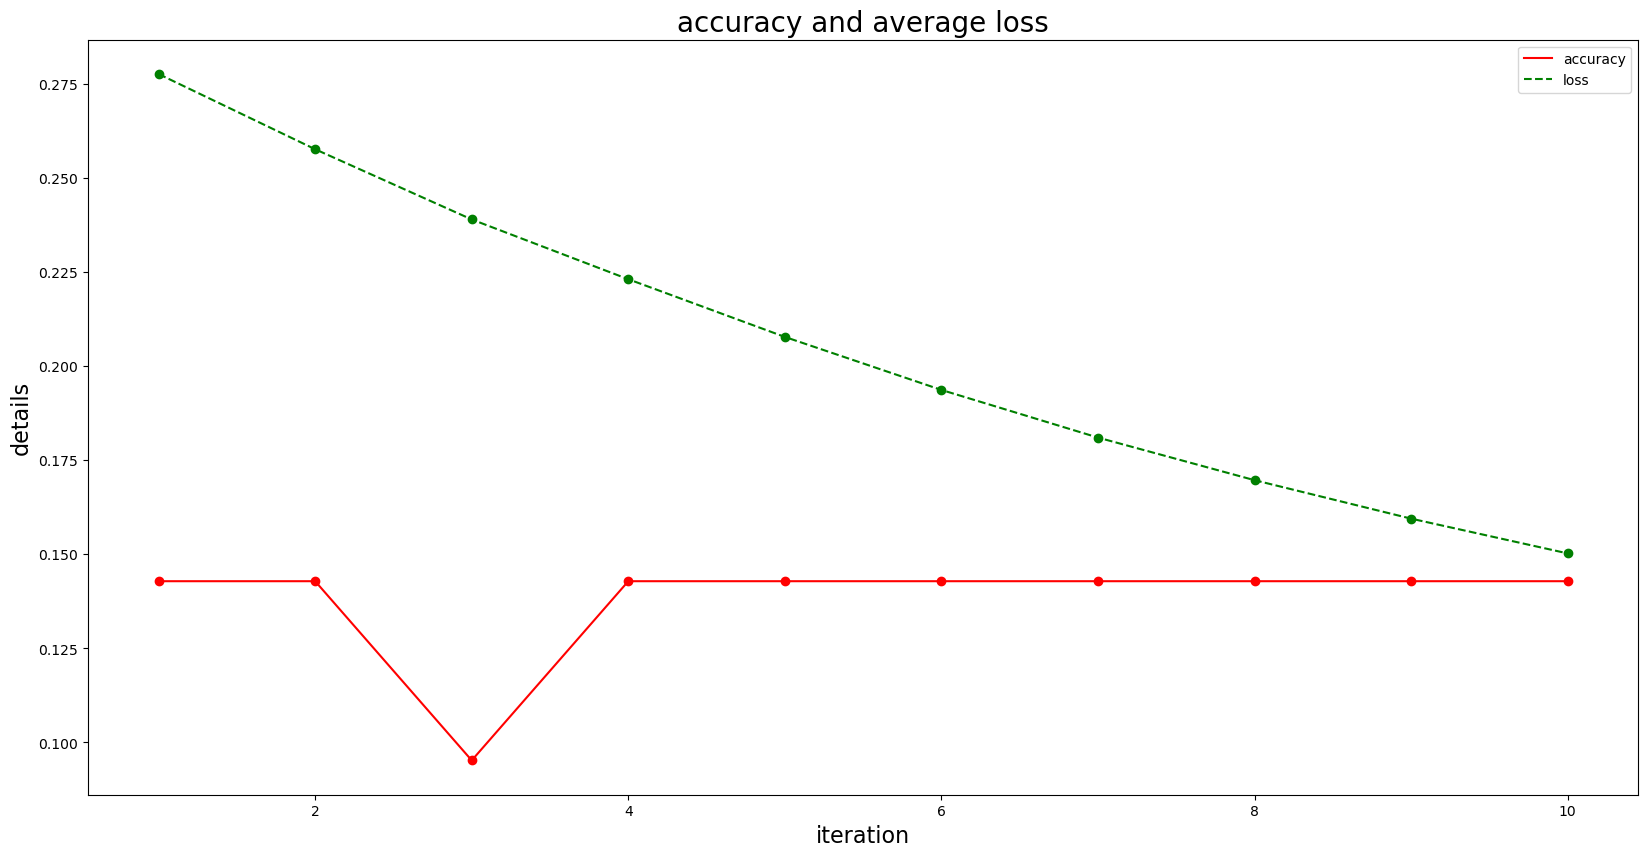

In [1]:
from model import *

start(10)

In [ ]:
from model import *

start(30)

Reading /home/dhz/bci-data/ds003478-download/sub-001/eeg/sub-001_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-002/eeg/sub-002_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-003/eeg/sub-003_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-004/eeg/sub-004_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-005/eeg/sub-005_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-006/eeg/sub-006_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-007/eeg/sub-007_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-008/eeg/sub-008_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-009/eeg/sub-009_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-010/eeg/sub-010_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-011/eeg/sub-011_task-Rest_run-01_eeg.fdt
Reading /h

Epoch [18/30]:  37%|████████████████▌                            | 11/30 [00:22<00:37,  1.97s/it, acc=0.273, loss=0.205]

Reading /home/dhz/bci-data/ds003478-download/sub-001/eeg/sub-001_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-002/eeg/sub-002_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-003/eeg/sub-003_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-004/eeg/sub-004_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-005/eeg/sub-005_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-006/eeg/sub-006_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-007/eeg/sub-007_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-008/eeg/sub-008_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-009/eeg/sub-009_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-010/eeg/sub-010_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-011/eeg/sub-011_task-Rest_run-01_eeg.fdt
Reading /h

Epoch [67/100]: 100%|████████████████████████████████████████████| 30/30 [01:10<00:00,  2.34s/it, loss=0.0624, mse=1.89]


Epoch [100/100]: 100%|███████████████████████████████████████████| 30/30 [01:12<00:00,  2.42s/it, loss=0.0625, mse=1.86]


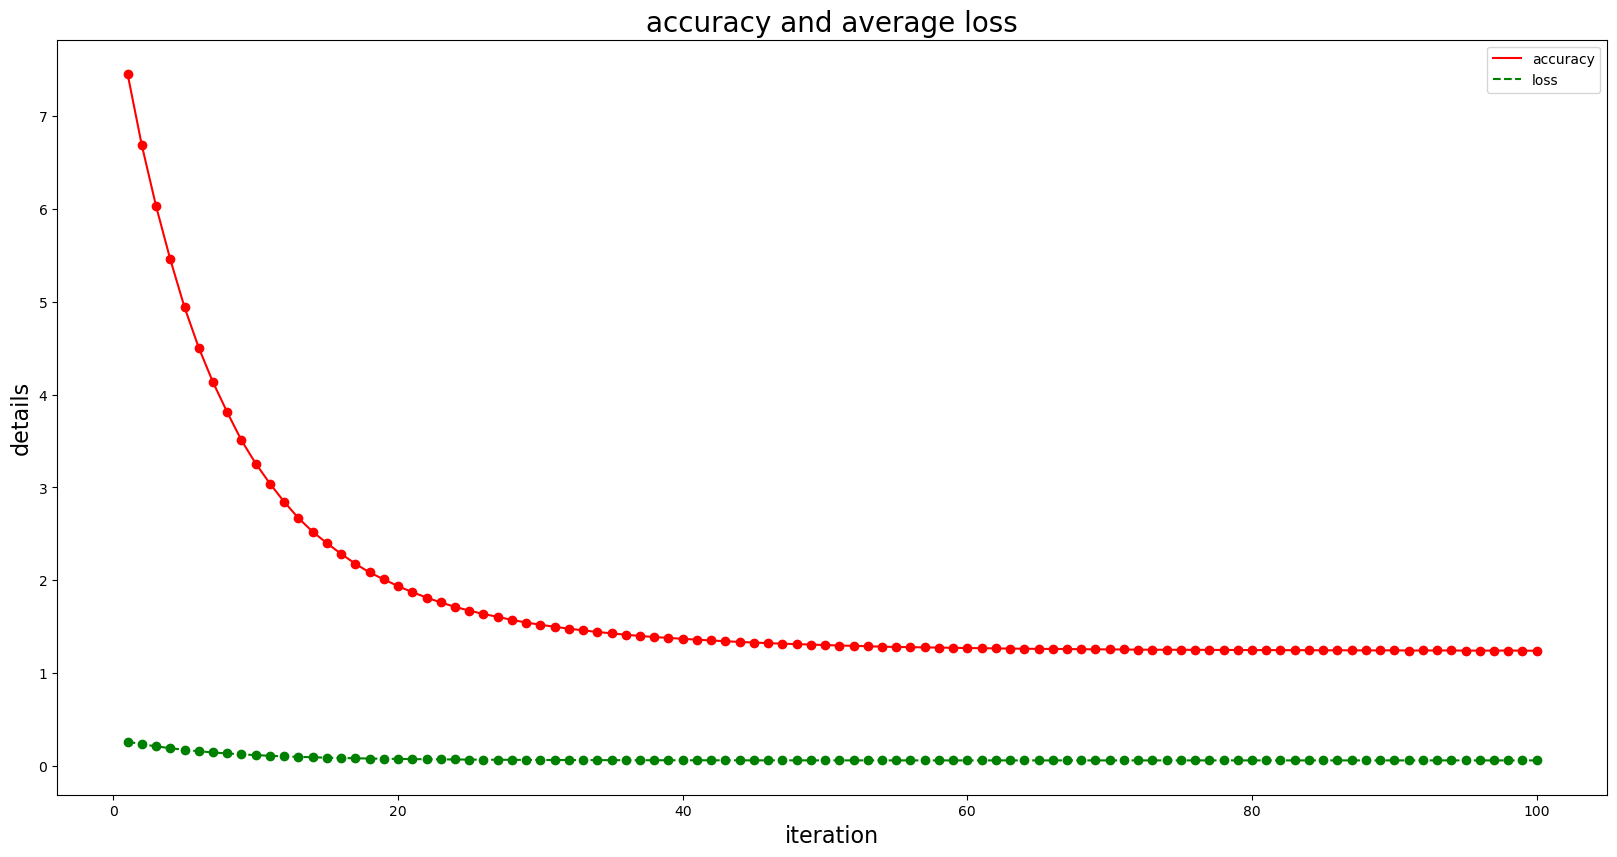

In [1]:
from model import *
start(100)